In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    precision_recall_fscore_support, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    accuracy_score
)

matplotlib.style.use('ggplot')
get_ipython().run_line_magic('matplotlib', 'inline')


In [2]:
feature_names = ["FH01", "FH02", "FH03", "FH04", "FH05", "FH06", "FH07", "FH08", "FH09", "FH10", "FH11", "FH12", "FH13", "FH14", "FH15", "FH16"]

In [3]:
data = pd.read_csv('Phishing_Legitimate_full.csv', index_col='id')
data

,FH01,FH02,FH03,FH04,FH05,FH06,FH07,FH08,FH09,FH10,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,is_spam
id,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
2,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
3,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
4,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
5,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3,1,1,50,0,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9997,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9998,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0


In [4]:
data = data[data.index > 2000]

In [5]:
prepared_data = data[feature_names + ['is_spam']].drop_duplicates()
data

,FH01,FH02,FH03,FH04,FH05,FH06,FH07,FH08,FH09,FH10,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,is_spam
id,,,,,,,,,,,,,,,,,,,,,
2001,2,0,3,47,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
2002,3,0,3,56,1,1,0,0,0,0,...,0,0,0,1,0,1,1,1,1,1
2003,2,0,3,44,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
2004,2,0,3,40,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
2005,2,0,3,42,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3,1,1,50,0,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9997,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9998,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0


In [6]:
neg, _ = prepared_data[prepared_data.is_spam == False].shape
pos, _ = prepared_data[prepared_data.is_spam == True].shape
neg, pos

(4652, 2350)

([<matplotlib.patches.Wedge at 0x7f6c10bc05b0>,
 [Text(0.5431471906229196, 0.9565516866946762, 'Положительный вердикт'),
  Text(-0.5431471010640853, -0.9565517375477819, 'Отрицательный вердикт')],
 [Text(0.29626210397613795, 0.5217554654698233, '33.6%'),
  Text(-0.2962620551258647, -0.521755493207881, '66.4%')])

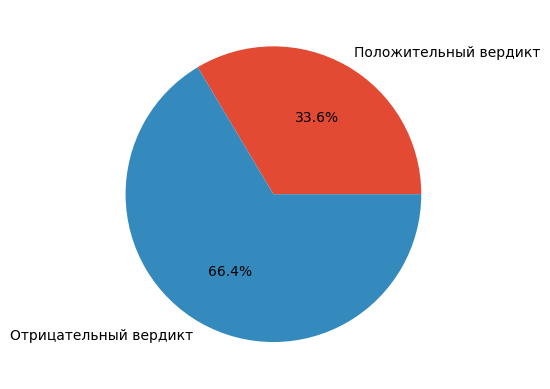

In [7]:
labels = 'Положительный вердикт', 'Отрицательный вердикт'
sizes = [pos, neg]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support


In [9]:
train_data, test_data = train_test_split(
    prepared_data,
    train_size=0.8,
    test_size=0.2,
    random_state=42
)


In [10]:
train_x = train_data[feature_names]
train_y = train_data[['is_spam']]
test_x = test_data[feature_names]
test_y = test_data[['is_spam']]


In [11]:
train_x

,FH01,FH02,FH03,FH04,FH05,FH06,FH07,FH08,FH09,FH10,FH11,FH12,FH13,FH14,FH15,FH16
id,,,,,,,,,,,,,,,,
2435,3,0,3,47,1,0,0,0,0,0,0,0,0,0,1,0
5551,1,0,2,186,4,0,0,0,1,5,6,5,0,6,1,0
3235,2,1,2,82,7,7,0,0,0,0,0,0,0,0,1,0
7367,2,1,5,67,1,1,0,0,0,0,0,0,0,6,1,1
7100,2,1,5,66,5,0,0,0,0,0,0,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,2,1,3,65,0,0,0,0,2,0,0,0,0,0,1,0
7955,2,1,4,77,3,0,0,0,0,0,0,0,0,9,1,1
7992,1,0,5,86,6,0,0,0,0,0,0,0,0,9,1,1


In [12]:
train_y

,is_spam
id,
2435,1
5551,0
3235,1
7367,0
7100,0
...,...
6493,0
7955,0
7992,0


In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
model = make_pipeline(
    MultinomialNB(alpha = 1),
    verbose = True
)

In [15]:
model.fit(train_x, train_y.is_spam)


[Pipeline] ..... (step 1 of 1) Processing multinomialnb, total=   0.0s


Pipeline(steps=[('multinomialnb', MultinomialNB(alpha=1))], verbose=True)

In [16]:
predictions = model.predict(test_x)
predictions

array([0, 1, 0, ..., 1, 1, 0])

In [17]:
accuracy = accuracy_score(test_y.is_spam, predictions)
precision, recall, fscore, _ = precision_recall_fscore_support(
    np.array(test_y.is_spam), 
    np.array(predictions), 
    average='binary'
)
print(f"{accuracy = }")
print(f"{precision = }")
print(f"{recall = }")
print(f"{fscore = }")

accuracy = 0.76802284082798
precision = 0.6180555555555556
recall = 0.898989898989899
fscore = 0.7325102880658436


In [18]:
# accuracy = 0.76802284082798
# precision = 0.6180555555555556
# recall = 0.898989898989899
# fscore = 0.7325102880658436

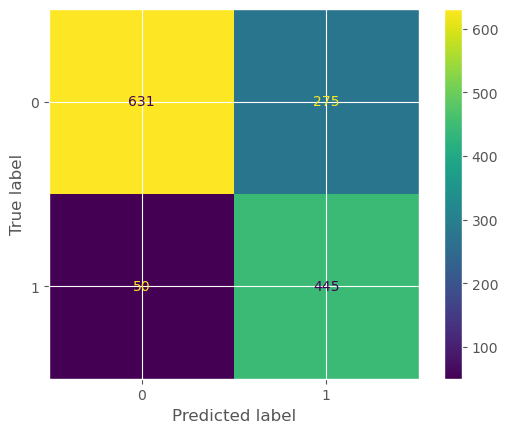

In [19]:
disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(test_y.is_spam, predictions)
)
disp.plot()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model_RF = make_pipeline(
    RandomForestClassifier(
        n_estimators=200,
        max_depth=20, 
        random_state=42
    ),
    verbose = True
)

In [22]:
model_RF.fit(train_x, train_y.is_spam)

[Pipeline]  (step 1 of 1) Processing randomforestclassifier, total=   0.6s


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200,
                                        random_state=42))],
         verbose=True)

In [23]:
predictions = model_RF.predict(test_x)
predictions

array([0, 1, 0, ..., 1, 0, 0])

In [24]:
accuracy = accuracy_score(test_y.is_spam, predictions)
precision, recall, fscore, _ = precision_recall_fscore_support(
    np.array(test_y.is_spam), 
    np.array(predictions), 
    average='binary'
)
print(f"{accuracy = }")
print(f"{precision = }")
print(f"{recall = }")
print(f"{fscore = }")

accuracy = 0.8872234118486795
precision = 0.8445807770961146
recall = 0.8343434343434344
fscore = 0.8394308943089431


In [25]:
# accuracy = 0.8872234118486795
# precision = 0.8445807770961146
# recall = 0.8343434343434344
# fscore = 0.8394308943089431

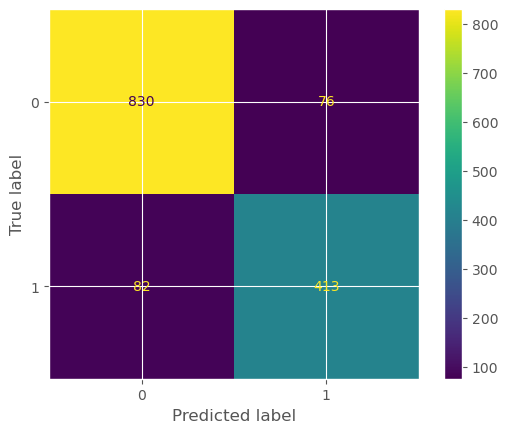

In [26]:
disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(test_y.is_spam, predictions)
)
disp.plot()
plt.show()

In [27]:
from sklearn import svm

In [28]:
model_SVM = make_pipeline(
    svm.SVC(),
    verbose = True
)

model_SVM.fit(train_x, train_y.is_spam)

[Pipeline] ............... (step 1 of 1) Processing svc, total=   0.7s


Pipeline(steps=[('svc', SVC())], verbose=True)

In [29]:
predictions = model_SVM.predict(test_x)
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
accuracy = accuracy_score(test_y.is_spam, predictions)
precision, recall, fscore, _ = precision_recall_fscore_support(
    np.array(test_y.is_spam), 
    np.array(predictions), 
    average='binary'
)
print(f"{accuracy = }")
print(f"{precision = }")
print(f"{recall = }")
print(f"{fscore = }")

accuracy = 0.8108493932905068
precision = 0.8212290502793296
recall = 0.593939393939394
fscore = 0.6893317702227433


In [31]:
# accuracy = 0.8108493932905068
# precision = 0.8212290502793296
# recall = 0.593939393939394
# fscore = 0.6893317702227433

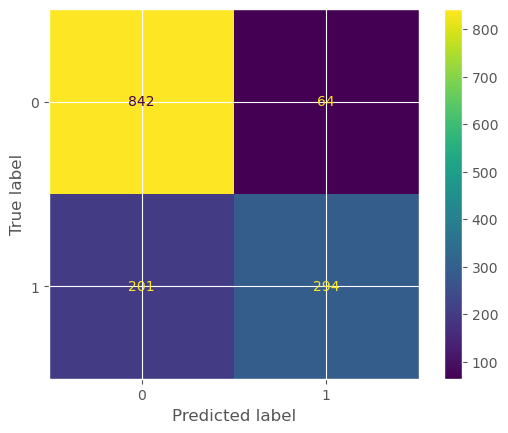

In [32]:
disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(test_y.is_spam, predictions)
)
disp.plot()
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model_LR = make_pipeline(
    LogisticRegression(random_state=42, max_iter=1000),
    verbose = True
)

model_LR.fit(train_x, train_y.is_spam)

[Pipeline]  (step 1 of 1) Processing logisticregression, total=   0.2s


Pipeline(steps=[('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))],
         verbose=True)

In [35]:
predictions = model_LR.predict(test_x)
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [36]:
accuracy = accuracy_score(test_y.is_spam, predictions)
precision, recall, fscore, _ = precision_recall_fscore_support(
    np.array(test_y.is_spam), 
    np.array(predictions), 
    average='binary'
)
print(f"{accuracy = }")
print(f"{precision = }")
print(f"{recall = }")
print(f"{fscore = }")

accuracy = 0.8265524625267666
precision = 0.7825112107623319
recall = 0.705050505050505
fscore = 0.7417640807651434


In [37]:
# accuracy = 0.8265524625267666
# precision = 0.7825112107623319
# recall = 0.705050505050505
# fscore = 0.7417640807651434

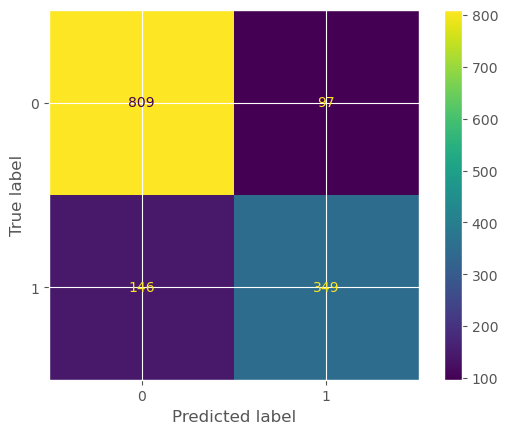

In [38]:
disp = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(test_y.is_spam, predictions)
)
disp.plot()
plt.show()